In [17]:
#%load_ext autoreload
#%autoreload 2

import numpy as np

import scipy as sp
import scipy.stats

from math import factorial
from scipy.spatial import distance

from optimizers import *
from exp_family import *
from projectors import *

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [18]:
def _dot(a, b):
    return sum(np.inner(x.ravel(), y.ravel()) for x, y in zip(a, b))


## Бублик

In [ ]:
#obj = lambda x: sp.stats.multivariate_normal.pdf(x, mean=[0, 0], cov=np.diag([1, 1]))
obj = lambda x: _dot(x, x) <= 4

In [ ]:
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1, 15))
thetas, estimations = projected_gradient(obj, GaussianDistribution, projector, 
                                         1e-6, (np.array([0, 0]), np.eye(2)), n_iters=10 ** 6)

In [ ]:
projector_m = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1, 15))
thetas_m, estimations_m = mirror_update(obj, GaussianDistribution, mirror, 
                                         1e-6, theta0 = (np.array([0, 0]), np.eye(2)), n_iters=10 ** 6)

In [ ]:

thetas_ad, estimations_ad = admm(obj, GaussianDistribution, projector, 1, 1e-6, 
                           (np.array([0, 0]), np.eye(2)), n_iters=10 ** 6)

In [ ]:
radius = 2
vol_true = np.pi*radius**2
plt.figure(figsize=(10, 7))
plt.title(r"Relative volume of the ball", #: $\displaystyle \| x \|^2_2 \leq 4$
          fontsize=15)
plt.plot(np.arange(1000, 1e6), np.fabs(np.array(estimations)[1000:] - vol_true), label = "Projected gradient descent")
plt.plot(np.arange(1000, 1e6), np.fabs(np.array(estimations_m)[1000:] - vol_true), label = "Mirror descent")
plt.plot(np.arange(1000, 1e6), np.fabs(np.array(estimations_ad)[1000:] - vol_true), label = "ADMM")
plt.xscale('log')
#plt.yscale('linscaley')
plt.legend(loc = 'best')

plt.savefig('ball_alt.png')

Довольно хорошо сходится.

## Ellipse, for random positive-definite A 

In [9]:
np.random.seed(42)
A = np.random.randn(2, 2) + 0.2 * np.eye(2)
A = (A + A.T)/2
obj = lambda x: np.inner(x, np.dot(A, x)) <= 4

In [10]:
A

array([[ 0.69671415,  0.25471212],
       [ 0.25471212,  1.72302986]])

In [11]:
zero_cov = np.array([[0.5, 0.],
                    [0., 2.]])

In [21]:
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1e-2, 2))
thetas, estimations = projected_gradient(obj, GaussianDistribution, projector, 
                                         1e-6, (np.array([0, 0]), 1*zero_cov), n_iters=10 ** 5)

In [22]:
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1e-2, 2))
thetas_m, estimations_m = mirror_update(obj, GaussianDistribution, mirror, 
                                         1e-6, theta0 = (np.array([0, 0]), 1*zero_cov), n_iters=10 ** 5)

In [23]:
thetas_ad, estimations_ad = admm(obj, GaussianDistribution, projector, 1, 1e-6, 
                           (np.array([0, 0]), 1*zero_cov), n_iters=10 ** 5)

In [24]:
u, v = np.linalg.eig(A/4)
u

array([ 0.15924413,  0.44569187])

In [25]:
np.pi/np.sqrt(u[0]*u[1])

11.792361948711326

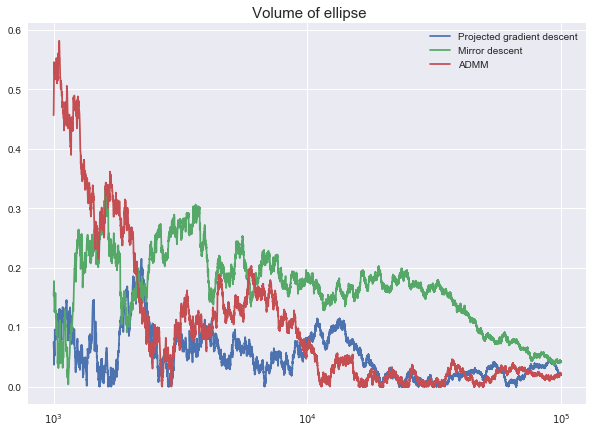

In [26]:
det = np.linalg.det(A/4)
vol_true = np.pi/np.sqrt(det)

plt.figure(figsize=(10, 7))
plt.title(r" Volume of ellipse", # $\displaystyle x^TAx \le 4$
          fontsize=15)
plt.plot(np.arange(1000, 1e5), np.fabs(np.array(estimations)[1000:] - vol_true), label = "Projected gradient descent")
plt.plot(np.arange(1000, 1e5), np.fabs(np.array(estimations_m)[1000:] - vol_true), label = "Mirror descent")
plt.plot(np.arange(1000,1e5), np.fabs(np.array(estimations_ad)[1000:] - vol_true), label = "ADMM")
plt.xscale('log')
plt.legend(loc = 'best')

plt.savefig('ellipse2_alt.png')

In [ ]:
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1, 15))
thetas_new, estimations_new = adamc(obj, GaussianDistribution, projector, 1e-5, (np.array([0, 0]), np.eye(2)), n_iter=1e7)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [ ]:
det = np.linalg.det(A/4)
vol_true = np.pi/np.sqrt(det)

plt.figure(figsize=(10, 7))
plt.title(r" Volume of ellipse", # $\displaystyle x^TAx \le 4$
          fontsize=15)
plt.plot(np.arange(1000, 1e7), np.fabs(np.array(estimations_new)[1000:] - vol_true), label = "Projected gradient descent")
#plt.plot(np.arange(1000, 1e6), np.fabs(np.array(estimations_m)[1000:] - vol_true), label = "Mirror descent")
#plt.plot(np.arange(1000,1e6), np.fabs(np.array(estimations_ad)[1000:] - vol_true), label = "ADMM")
plt.xscale('log')
plt.legend(loc = 'best')

plt.savefig('ellipse2_alt_alt.png')

### For Non-Random ellipse

In [3]:
A = np.array([[1./4., 0], [0, 1./9.]])
obj = lambda x: np.inner(x, np.dot(A, x)) <= 1

In [4]:
A

array([[ 0.25      ,  0.        ],
       [ 0.        ,  0.11111111]])

In [5]:
zero_cov = np.array([[0.01, 0], 
                    [0, 0.005]])

In [6]:
projector = CoordProjector(BoxProjector(-10, 10), EigenBoxProjector(1e-1, 2))

thetas, estimations = projected_gradient(obj, GaussianDistribution, projector, 
                                         1e-6, (np.array([0, 0]),  zero_cov), n_iters=10 ** 5)

In [7]:
#projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(1e-2, 2))
thetas_m, estimations_m = projected_mirror(obj, GaussianDistribution, mirror, projector,
                                         1e-6, theta0 = (np.array([0, 0]), zero_cov), n_iters=10 ** 5)

In [8]:
thetas_ad, estimations_ad = admm(obj, GaussianDistribution, projector, 1, 1e-6, 
                           (np.array([0, 0]), zero_cov), n_iters=10 ** 5)

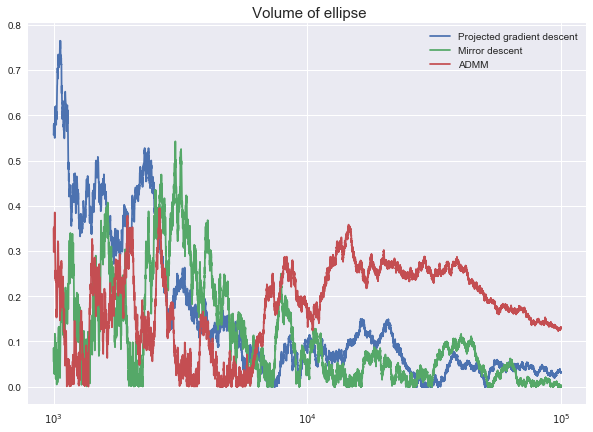

In [16]:
#det = np.linalg.det(A/4)
vol_true = np.pi*2*3

plt.figure(figsize=(10, 7))
plt.title(r" Volume of ellipse", # $\displaystyle x^TAx \le 4$
          fontsize=15)
plt.plot(np.arange(1000, 1e5), np.fabs(np.array(estimations)[1000:] - vol_true), label = "Projected gradient descent")
plt.plot(np.arange(1000, 1e5), np.fabs(np.array(estimations_m)[1000:] - vol_true), label = "Mirror descent")
plt.plot(np.arange(1000,1e5), np.fabs(np.array(estimations_ad)[1000:] - vol_true), label = "ADMM")
plt.xscale('log')
plt.legend(loc = 'best')

plt.savefig('ellipse201_altt.png')